In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

#%% function definitions

def generate_gabor_filters():
     filters = []                                                                                                            
     ksize = 5 # kernel size
     phi_list = [np.pi/2, np.pi] # phase offset of sinusoid 
     lamda = 5.2 # wavelength of sinusoid 
     theta_list = [0,np.pi/4, np.pi/2, 3*np.pi/4, np.pi] # filter orientation
     b = 1.1 # spatial bandwidth in octaves (will be used to determine SD)
     sigma = lamda*(2**b+1)/np.pi*(2**b-1) * np.sqrt(np.log(2)/2)
     gamma = 0.5 # filter aspect ratio
     for phi in phi_list:
         for theta in theta_list:
             filt = cv2.getGaborKernel((ksize,ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)
             filters.append(filt)
     return filters

def plot_kernel(image, kernels, centre_x, centre_y, filter_num, weight):
    kernel = kernels[filter_num]
    weighted_kernel = 2 * np.array(kernel) #[x * weight for x in kernel]
    if int(np.floor(-len(kernel)/2+centre_x)) >= 0 and int(np.floor(len(kernel)/2+centre_x)) <= 255 and int(np.floor(-len(kernel)/2+centre_y)) >= 0 and int(np.floor(len(kernel)/2+centre_y)) <= 255:
        image[int(np.floor(-len(kernel)/2+centre_x)):int(np.floor(len(kernel)/2+centre_x)),
              int(np.floor(-len(kernel)/2+centre_y)):int(np.floor(len(kernel)/2+centre_y))] = image[int(np.floor(-len(kernel)/2+centre_x)):int(np.floor(len(kernel)/2+centre_x)),int(np.floor(-len(kernel)/2+centre_y)):int(np.floor(len(kernel)/2+centre_y))] + weighted_kernel
    return image


/apps/jupyterhub/2019-04-29/miniconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: read_table is deprecated, use read_csv instead.
  


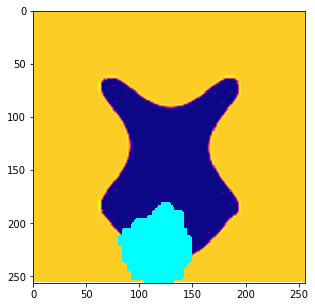

In [49]:
#%% read in data
def read_images(img_dir):
    images = [cv2.imread(file, 0) for file in glob.glob(img_dir+"/*.png")]
    # for image_idx, image in enumerate(images):
    #     fig, ax = plt.subplots(1,1)
    #     ax.imshow(image, cmap='gray')
    #     ax.set_title('Stimulus {}'.format(image_idx+1))
    #     plt.axis('off')
    #     plt.show()
    return images
ims = read_images('input_data/n4p2_resized')
im = ims[12]

data = pd.read_table('weights/simulation_20/weighted_inputs_l3_1847.csv', sep=',')
multi_weights =  np.array(data.loc[0])
# multi_weights = [x*10e60 for x in multi_weights]
cent_x = np.array(data.loc[1]).astype(int)
cent_y = np.array(data.loc[2]).astype(int)
filt_n = np.array(data.loc[3]).astype(int)

# crude plot

plt.figure(1,[5,5])
plt.scatter(cent_y,cent_x,marker='s',color='cyan')
plt.xlim([0,256])
plt.ylim([256,0])
plt.imshow(im,cmap='plasma')
norm_weights = multi_weights / np.linalg.norm(multi_weights)


In [52]:
filters = generate_gabor_filters()
empty_image = np.zeros([256,256])

heat = np.zeros([256,256])

i=0
new_image = plot_kernel(empty_image, filters, cent_x[0], cent_y[0], filt_n[0], norm_weights[0])
for i in range(len(cent_x[1:])):
    heat[cent_x[i],cent_y[i]] = multi_weights[i]
    if multi_weights[i+1] >= 0.005:
        new_image = plot_kernel(new_image, filters, cent_x[i+1], cent_y[i+1], filt_n[i+1], norm_weights[i+1])
#     print('x : {}\ny: {}\nf: {}'.format(cent_x[i+1],cent_y[i+1],filt_n[i+1]))

x_locs = []
y_locs = []
circle = np.zeros([256,256])

im = ims[11]
for i in range(256):
    for j in range(256):
        if im[i,j] == 0:
            circle[i,j] = 1
        else:
            circle[i,j] == 0
            x_locs.append(i)
            y_locs.append(j)
new_image = -(new_image+20*circle)

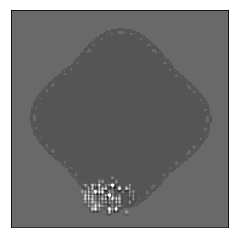

In [53]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) # this line adds sub-axes
# plt.scatter(y_locs,x_locs,alpha=0.006,color='k',marker=',')
im = ax.imshow(new_image,cmap='gray',vmax=150) # this line creates the image using the pre-defined sub axes
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
# fig.colorbar(im)
# cbar = fig.colorbar(im)
# cbar.ax.set_yticklabels(['min', 'max'])  # vertically oriented colorbar
plt.savefig('simulation_20_l3_1847.png',dpi=100)


multi_weights

In [13]:
circle

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [106]:
print(circle)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


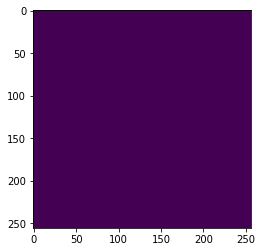

In [107]:
plt.imshow(circle)

In [108]:
ims[4]

array([[128, 128, 128, ..., 128, 128, 128],
       [128, 128, 128, ..., 128, 128, 128],
       [128, 128, 128, ..., 128, 128, 128],
       ...,
       [128, 128, 128, ..., 128, 128, 128],
       [128, 128, 128, ..., 128, 128, 128],
       [128, 128, 128, ..., 128, 128, 128]], dtype=uint8)

In [195]:
multi_weights

array([3.35153088e-09, 1.43780516e-32, 1.08849622e-45, ...,
       2.25457255e-77, 1.86069038e-77, 2.33940636e-77])

In [196]:
norm_weights

array([3.00528135e-08, 1.28926428e-31, 9.76042738e-45, ...,
       2.02165072e-76, 1.66846086e-76, 2.09772028e-76])

In [197]:
np.linalg.norm(multi_weights)

0.11152136825138861

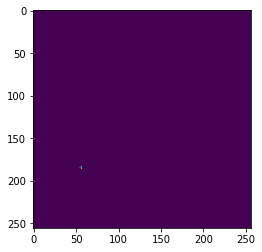

In [46]:
plt.imshow(heat)

TypeError: Invalid dimensions for image data

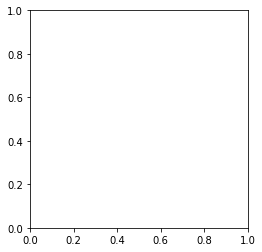

In [142]:
ims = read_images('input_data/n3p2_resized')
for i in range(8):
    plt.imshow(i)

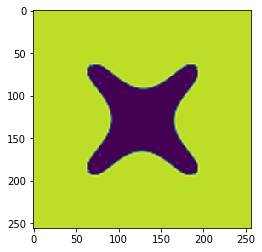

In [276]:
plt.imshow(ims[9])